<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/LinearRegressionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

<ipython-input-9-7fe7a93f45d9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<ipython-input-10-912786f26090>:1: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/vehicles.csv')


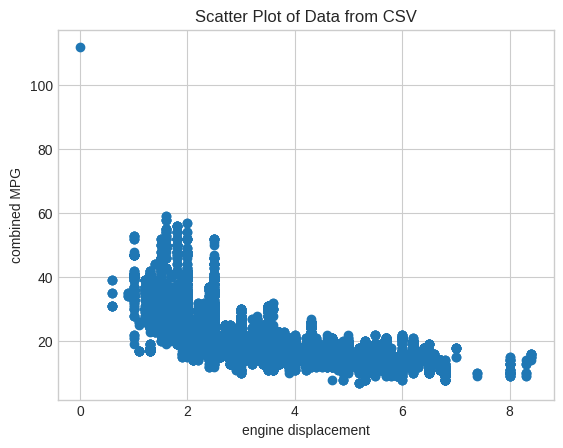

In [ ]:
data = pd.read_csv('/content/vehicles.csv')
x = data['displ']
y = data['comb08']
plt.scatter(x, y)
plt.ylabel('combined MPG')
plt.xlabel('engine displacement')
plt.title('Scatter Plot of Data from CSV')
plt.show()

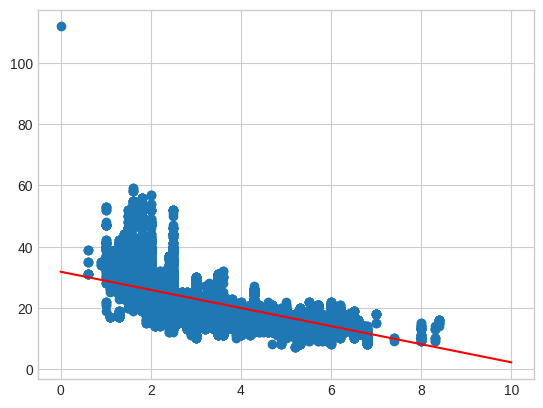

In [ ]:
# Ensuring x and y are NumPy arrays
x = np.array(x)
y = np.array(y)

# Impute missing values (using the mean strategy)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x.reshape(-1, 1))  # Reshape to 2D array
y_imputed = imputer.fit_transform(y.reshape(-1, 1))  # Reshape to 2D array

# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(x_imputed, y_imputed)

# Generate predictions
xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit.reshape(-1, 1))

# Plot the results
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.show()

added
x = np.array(x)
y = np.array(y)

to fix-> ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [-2.96302758]
Model intercept: [31.76932531]
